In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import librosa

# Emotion Recognition using existing packages

This project demonstrates how to use existing packages for emotion recognition using Hidden Markov Models (HMM) and Mel-Frequency Cepstral Coefficients (MFCC). 

The code is structured to provide similar evaluation results as the original implementation.



In [2]:
# Global configuration
n_mfcc = 13  # Number of MFCC features

# Paths to training and testing data
train_path = 'data/data'
test_path = 'data/test_data'

In [3]:
# Function to extract MFCC features from an audio file
def extract_mfcc(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc = np.mean(mfcc.T, axis=0)
    return mfcc

# Load data from folders
def load_data(data_path):
    X, y = [], []
    valid_extensions = {'.wav', '.mp3', '.flac', '.ogg', '.m4a', '.aiff', '.au'}  # Common audio extensions
    for emotion in os.listdir(data_path):
        emotion_path = os.path.join(data_path, emotion)
        if os.path.isdir(emotion_path):
            for file in os.listdir(emotion_path):
                file_path = os.path.join(emotion_path, file)
                if not any(file.lower().endswith(ext) for ext in valid_extensions):
                    continue  # Skip non-audio files
                try:
                    mfcc = extract_mfcc(file_path)
                    X.append(mfcc)
                    y.append(emotion)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    return np.array(X), np.array(y)

# Train HMM models for each emotion
def train_hmm(X_train, y_train):
    models = {}
    emotions = np.unique(y_train)
    for emotion in emotions:
        X_emotion = [x for x, y in zip(X_train, y_train) if y == emotion]
        X_emotion = np.vstack(X_emotion)
        model = hmm.GaussianHMM(n_components=4, covariance_type='diag', n_iter=100)
        model.fit(X_emotion)
        models[emotion] = model
        print(f"Trained HMM for emotion: {emotion}")
    return models

# Evaluate HMM models
def evaluate(models, X_test, y_test):
    y_pred = []
    for x, true_label in zip(X_test, y_test):
        scores = {emotion: model.score([x]) for emotion, model in models.items()}
        predicted_label = max(scores, key=scores.get)
        y_pred.append(predicted_label)
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred, labels=list(models.keys()))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=models.keys(), yticklabels=models.keys())
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [4]:
# Load training and testing data
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Train and evaluate models
models = train_hmm(X_train, y_train)

Trained HMM for emotion: Anger
Trained HMM for emotion: Disgust
Trained HMM for emotion: Fear
Trained HMM for emotion: Happy
Trained HMM for emotion: Neutral
Trained HMM for emotion: Sad


              precision    recall  f1-score   support

       Anger       0.62      0.57      0.59      1271
     Disgust       0.21      0.29      0.24      1271
        Fear       0.22      0.13      0.16      1271
       Happy       0.35      0.30      0.32      1271
     Neutral       0.32      0.33      0.32      1087
         Sad       0.24      0.29      0.26      1271

    accuracy                           0.32      7442
   macro avg       0.33      0.32      0.32      7442
weighted avg       0.33      0.32      0.32      7442



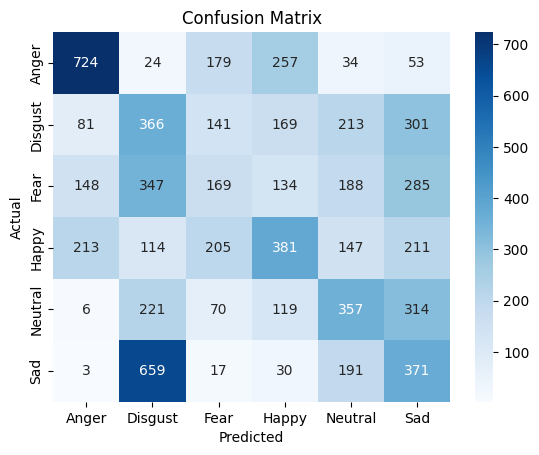

In [5]:
evaluate(models, X_train, y_train)

              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        48
     Disgust       0.00      0.00      0.00        48
        Fear       0.31      0.08      0.13        48
       Happy       0.00      0.00      0.00        48
     Neutral       0.00      0.00      0.00        48
         Sad       0.17      0.96      0.28        48

    accuracy                           0.17       288
   macro avg       0.08      0.17      0.07       288
weighted avg       0.08      0.17      0.07       288



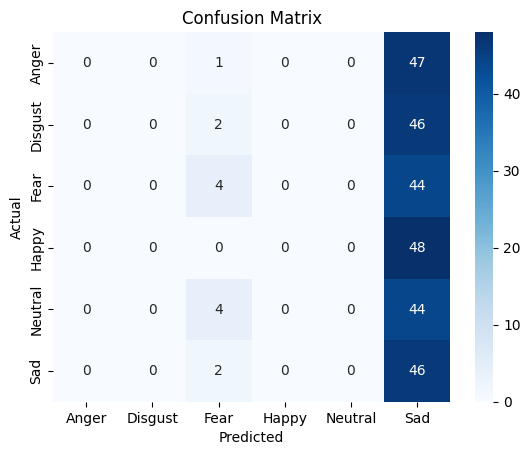

In [6]:
evaluate(models, X_test, y_test)